# Unemployment Regression Task

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
from datetime import datetime
from sklearn.svm import SVR
import calendar
from sklearn.preprocessing import LabelEncoder


## Load Dataset

In [2]:
read=pd.read_csv("Unemployment in India.csv")
df=pd.DataFrame(read)
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## Data Preprocessing

In [3]:
df.columns
#['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',' Estimated Employed', ' Estimated Labour Participation Rate (%)',  'Area'],

#our target variable :Estimated Unemployment Rate (%)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 40.6+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.isnull().sum()
#no null data already cleaned

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [7]:
df[df.duplicated()]
#no duplicates in this dataset

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area


In [8]:
df['Region'].value_counts()
#Total 28 regions

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [9]:
df['Area'].value_counts()
#only rural and urban areas

Urban    381
Rural    359
Name: Area, dtype: int64

In [10]:
df['Frequency'].value_counts()


Monthly     381
 Monthly    359
Name: Frequency, dtype: int64

In [11]:
df['Frequency']="Monthly"
print(df['Frequency'].value_counts())
#Data is misplace by just space 

Monthly    740
Name: Frequency, dtype: int64


In [12]:
df["Date"]

0       31-05-2019
1       30-06-2019
2       31-07-2019
3       31-08-2019
4       30-09-2019
          ...     
735     29-02-2020
736     31-03-2020
737     30-04-2020
738     31-05-2020
739     30-06-2020
Name: Date, Length: 740, dtype: object

In [13]:
Date= df["Date"].str.split('-', expand=True)
df["Day"]=Date[0]
df["month"]=Date[1]
df["year"]=Date[2]


# Data Visulization

#### Which Region hve hign unemployment

Text(0.5, 1.0, 'Regions')

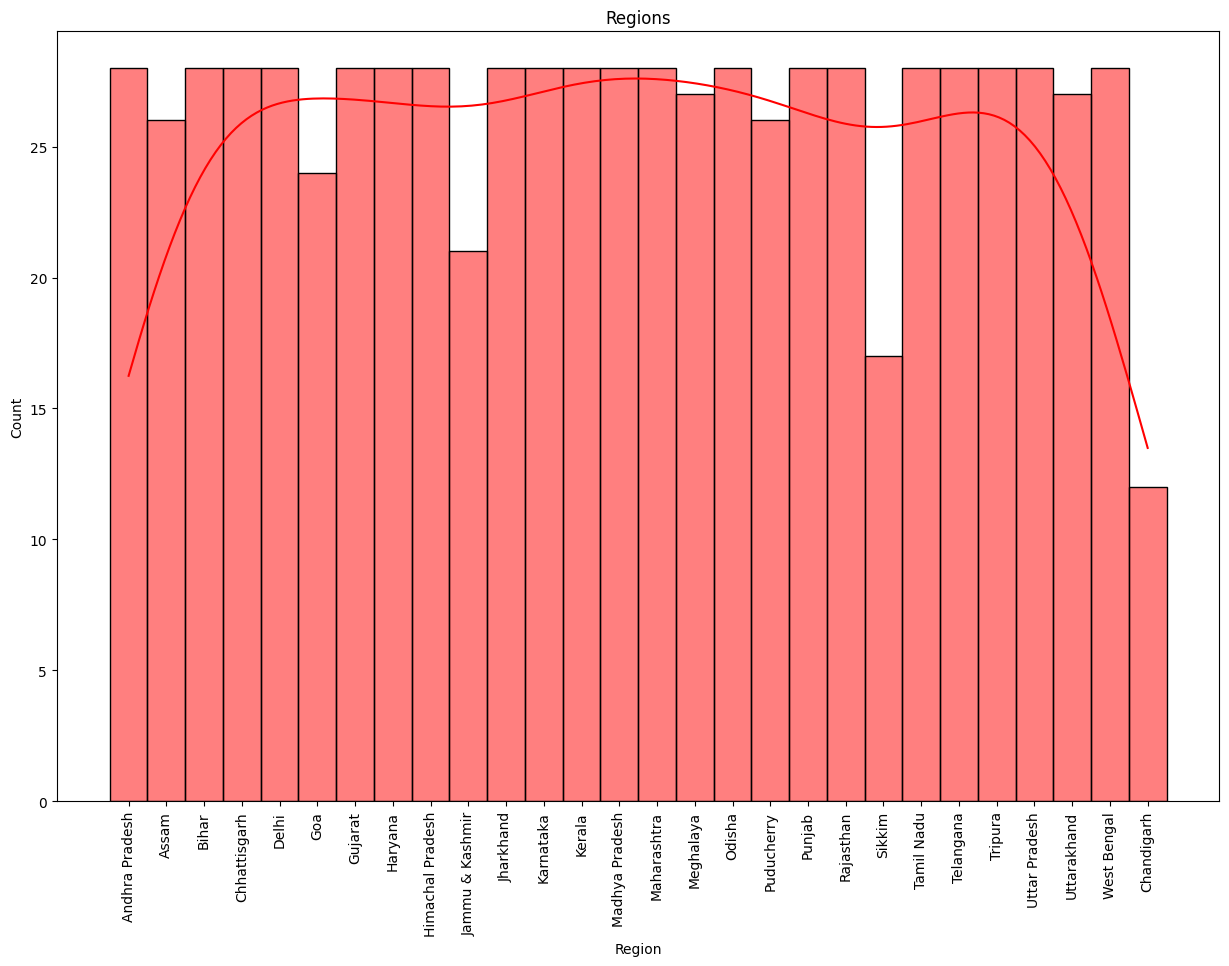

In [14]:
plt.figure(figsize=(15, 10))
sns.histplot(df['Region'], kde=True,color="red")
plt.xticks(rotation=90)
plt.title('Regions')

Text(0.5, 1.0, 'Area')

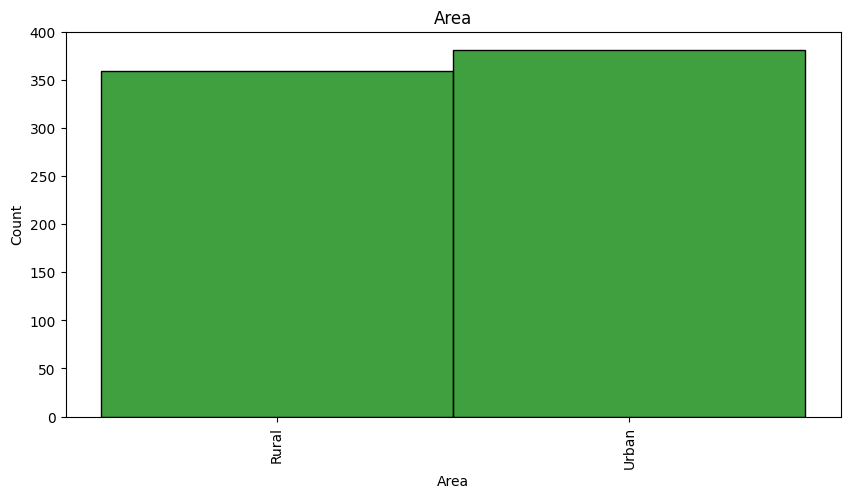

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Area'],color="green")
plt.xticks(rotation=90)
plt.title('Area')

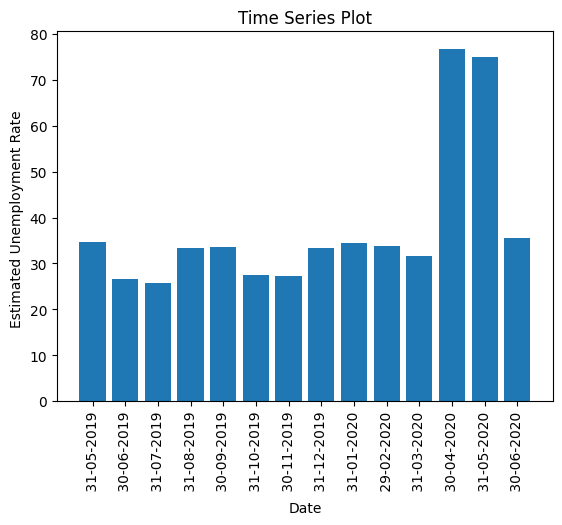

In [16]:
plt.bar(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate ')
plt.title('Time Series Plot')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr( numeric_only=True)
correlation_matrix

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


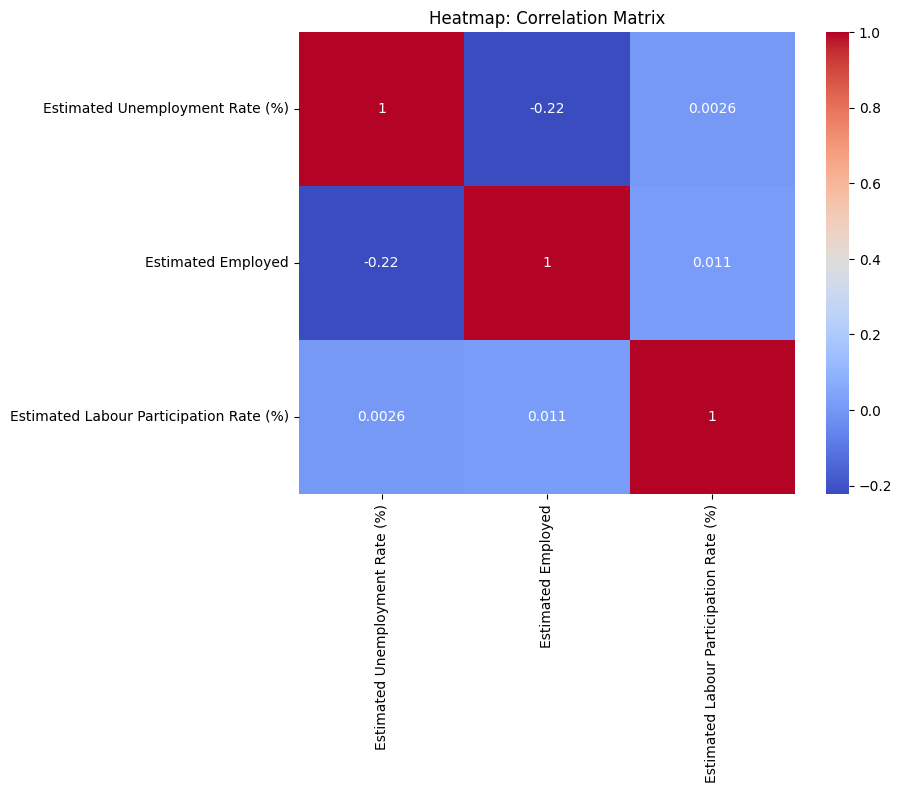

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

# Feature Engineering

In [19]:

label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df["Area"]=label_encoder.fit_transform(df["Area"])

In [20]:
numerical_features = ["Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"]

scaler_minmax = MinMaxScaler()
df[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

In [21]:
df.describe()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740.000000,740.000000,740.000000,740.000000,740.000000
mean,13.690541,0.153609,0.156469,0.494600,0.514865
std,8.052612,0.139709,0.176871,0.136919,0.500117
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.060692,0.024952,0.417497,0.000000
50%,14.000000,0.108809,0.102667,0.469784,1.000000
75%,20.000000,0.207030,0.245496,0.543130,1.000000
max,27.000000,1.000000,1.000000,1.000000,1.000000


# Model Training

In [22]:
x = df.drop(['Estimated Unemployment Rate (%)',"Frequency","Date"], axis=1)
y=df["Estimated Unemployment Rate (%)"]
print(x.columns)

Index(['Region', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Area', 'Day', 'month',
       'year'],
      dtype='object')


In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
df.describe()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740.000000,740.000000,740.000000,740.000000,740.000000
mean,13.690541,0.153609,0.156469,0.494600,0.514865
std,8.052612,0.139709,0.176871,0.136919,0.500117
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.060692,0.024952,0.417497,0.000000
50%,14.000000,0.108809,0.102667,0.469784,1.000000
75%,20.000000,0.207030,0.245496,0.543130,1.000000
max,27.000000,1.000000,1.000000,1.000000,1.000000


## Linear Regression Model

In [25]:
Linear = LinearRegression()

Linear.fit(X_train, y_train)

y_pred =Linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared (R²): {r2}")



Mean Squared Error: 0.02050787505792256
R-squared (R²): 0.16581465700386688


In [26]:
n_features = Linear.coef_.shape[0]
print("Number of features:", n_features)


Number of features: 7


## Decision Tree Regressor

In [27]:
DecisionTree = DecisionTreeRegressor()

DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)



In [28]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")


y_test shape: (148,)
y_pred shape: (148,)


In [29]:

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared (R²): {r2}")

Mean Squared Error: 0.02063000214619932
R-squared (R²): 0.16084697377313095


## Random Forest Classifier

In [30]:
RandomForest = RandomForestRegressor()

RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared (R²): {r2}")

Mean Squared Error: 0.009462249991442176
R-squared (R²): 0.6151102816682591


## Save Models

In [31]:
#Logestic Regression mode
pickle.dump(Linear , open("logestic.pkl", "wb"))

#Decision Tree classifier
pickle.dump(DecisionTree , open("DecisionTree.pkl", "wb"))

#Random Forest Classifier
pickle.dump(RandomForest, open("RandomForest.pkl", "wb"))


In [32]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,month,year
0,0,31-05-2019,Monthly,0.047563,0.261321,0.504895,0,31,05,2019
1,0,30-06-2019,Monthly,0.039745,0.256002,0.484808,0,30,06,2019
2,0,31-07-2019,Monthly,0.048866,0.263236,0.509284,0,31,07,2019
3,0,31-08-2019,Monthly,0.043263,0.267588,0.517218,0,31,08,2019
4,0,30-09-2019,Monthly,0.067370,0.266955,0.529203,0,30,09,2019
...,...,...,...,...,...,...,...,...,...,...
735,27,29-02-2020,Monthly,0.098384,0.236654,0.519244,1,29,02,2020
736,27,31-03-2020,Monthly,0.086917,0.235231,0.506583,1,31,03,2020
737,27,30-04-2020,Monthly,0.203675,0.202284,0.470459,1,30,04,2020
738,27,31-05-2020,Monthly,0.198332,0.201003,0.461512,1,31,05,2020


In [33]:
df.to_csv('Last.csv', mode='a')

In [34]:
## Save Models